# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, the goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



## Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls for a term deposit product.
*   bank-additional-full.csv is a dataset with 41188 campaingns and 20 inputs

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y)






## Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

### Import Module Libraries

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import time

# data vizualization
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
# plt.rcParams["figure.figsize"] = (8,4)
# plt.style.use("fivethirtyeight")

# pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures

# validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# model
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn import tree


import warnings
warnings.filterwarnings("ignore")

print("All modules loaded")

All modules loaded


In [ ]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')
df_orig = df.copy()

In [ ]:
print(df.shape)
df.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
# Duplicate check

print(sum(df.duplicated()))
df[df.duplicated()]

12


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [ ]:
# Missing value check
df.isnull().sum()
# df.isna().mean().round(4).multiply(100)

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


## Problem 4: EDA


In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


In [ ]:
df['y'].value_counts()

,count
y,
no,36548
yes,4640


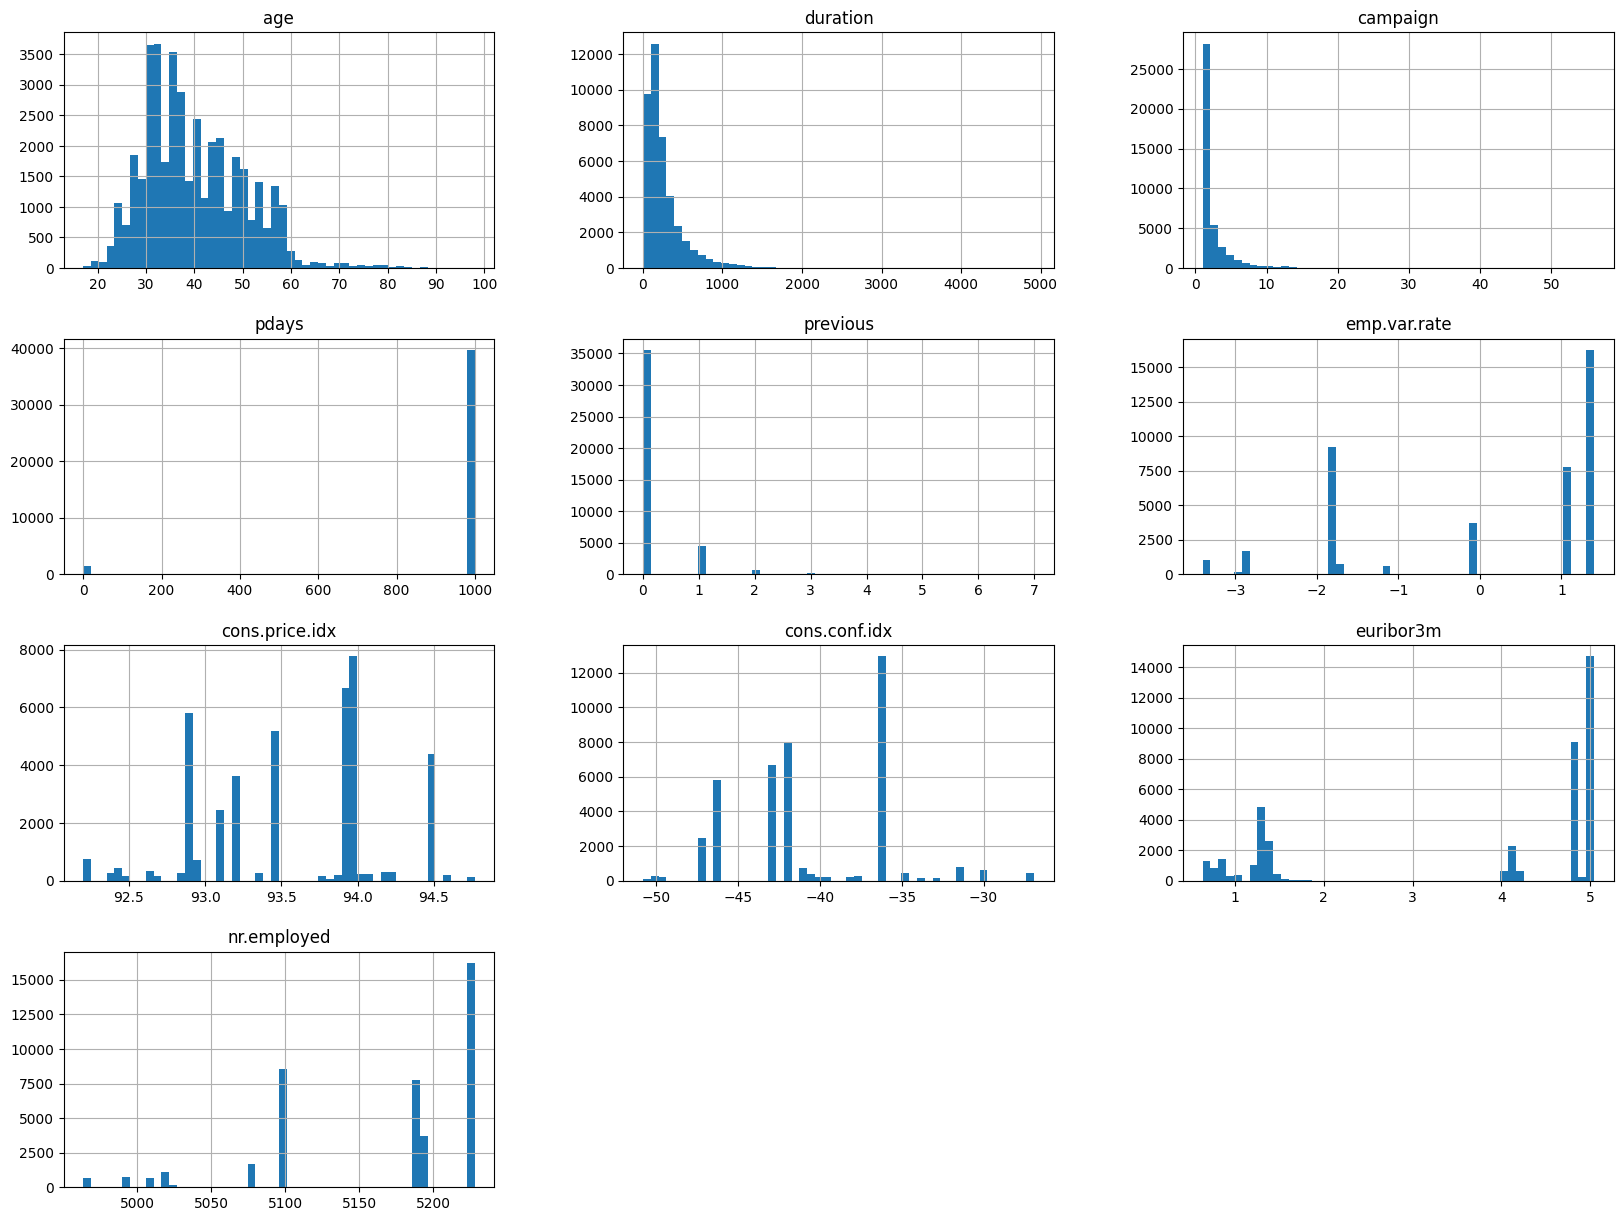

In [ ]:
df.select_dtypes(include=np.number).hist(bins=50, figsize=(20,15))
plt.show()

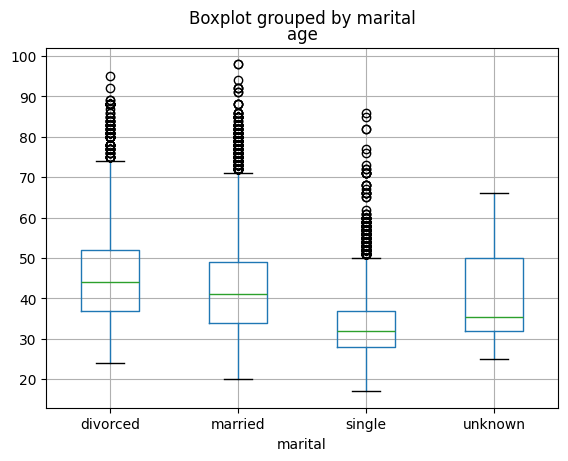

In [ ]:
df.boxplot(column = "age", by = "marital")
plt.show()


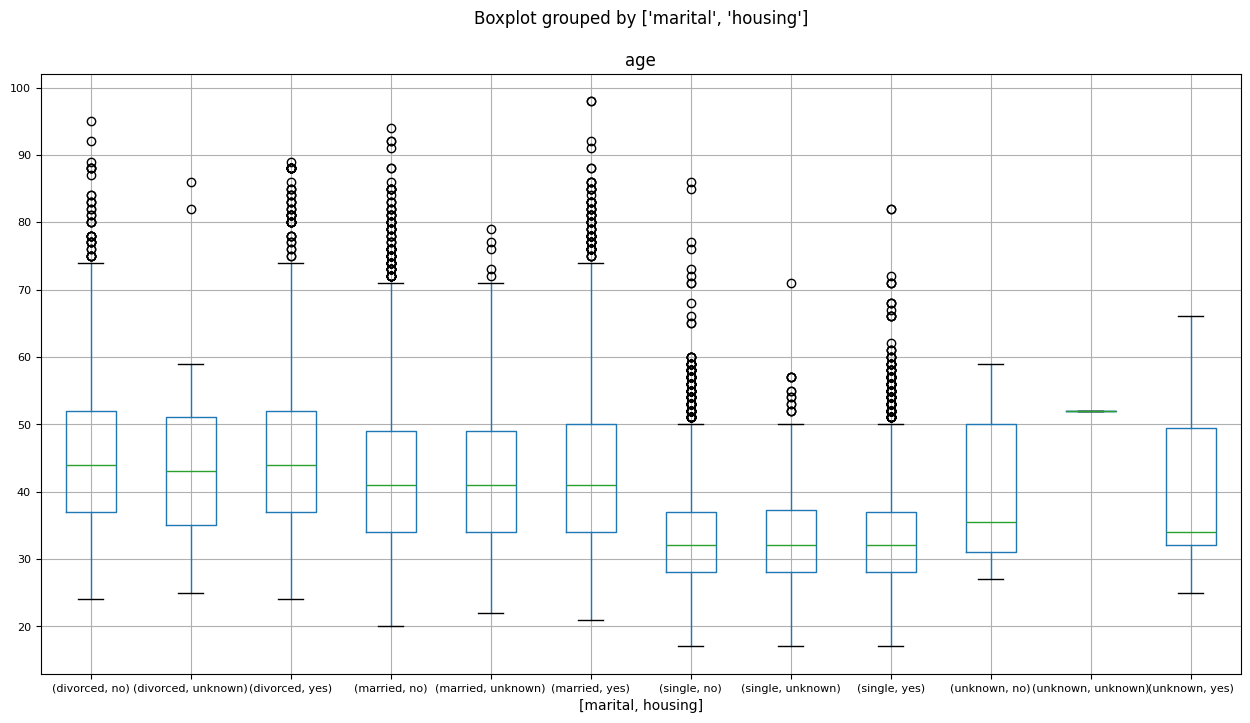

In [ ]:
df.boxplot(column = "age", by = ["marital", "housing"], figsize = (15, 8), fontsize=8)
plt.show()

In [ ]:
# Define a function for outlier removal

def outlr_remover(df):
    for i in df.columns:
        # Select only the numerical columns in the Dataset
        if np.issubdtype(df[i].dtype, np.number) == True:
            # Define q1 and q3
            q1, q3 = np.percentile(df[i], [25, 75])
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            # Filtering the Data
            df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]

In [ ]:
outlr_remover(df)
df.shape

(41188, 21)

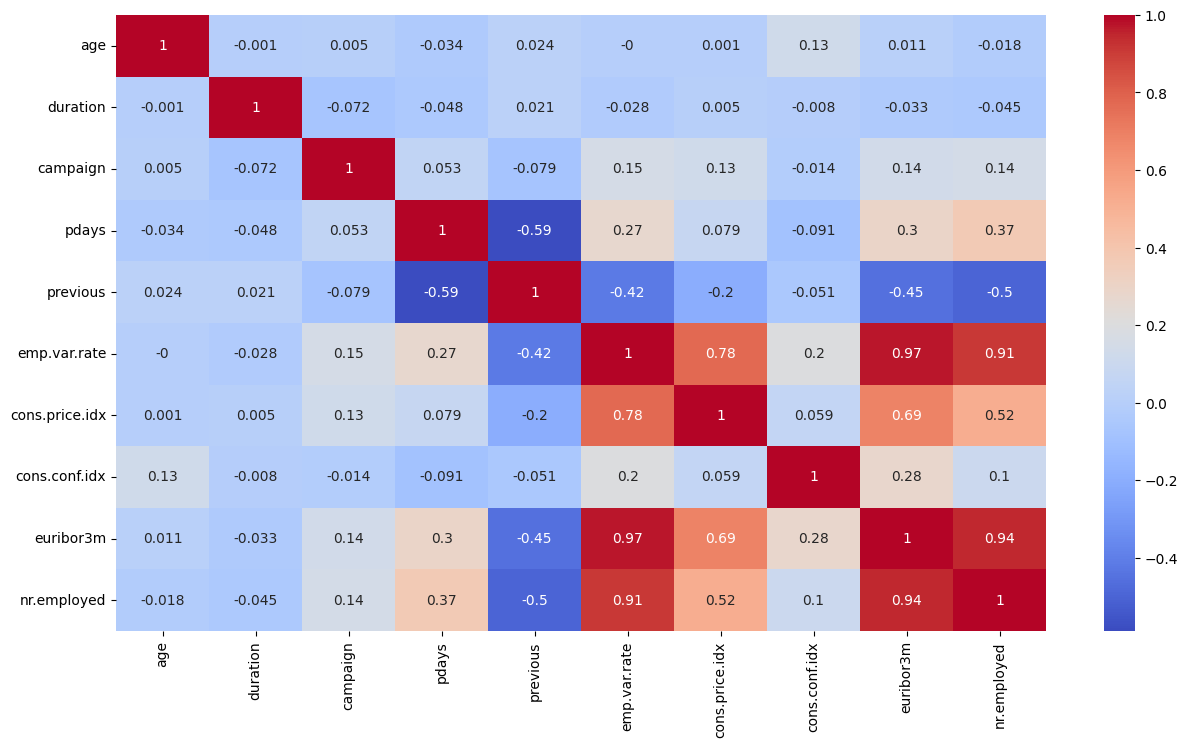

In [ ]:
corr = df.corr(numeric_only = True).round(3)
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot = True, cmap='coolwarm');

## Problem 5: Engineering (Pre-processing) Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object','string']).columns.tolist()
print(numerical_cols)
print(categorical_cols)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

## Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [ ]:
X = df.drop('y', axis=1)
y = df['y']
X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)

(28831, 20)
(12357, 20)


## Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [ ]:
# Create a dummy classifier
dummy = DummyClassifier(strategy='most_frequent')

# Train the dummy classifier
dummy.fit(X_train, y_train)

# Get the baseline performance for the training set
y_pred_train = dummy.predict(X_train)
baseline_train = accuracy_score(y_train, y_pred_train)

# Get the baseline performance for the test set
y_pred_test = dummy.predict(X_test)
baseline_test = accuracy_score(y_test, y_pred_test)

print(f'Baseline accuracy for training set: {baseline_train * 100:.2f}%')
print(f'Baseline accuracy for test set: {baseline_test * 100:.2f}%')

Baseline accuracy for training set: 88.72%
Baseline accuracy for test set: 88.76%


## Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a Logistic Regression model and train the model
model_logreg = LogisticRegression()
model_logreg.fit(X_train, y_train)

# Predict on the training/test data
y_train_pred = model_logreg.predict(X_train)
y_test_pred = model_logreg.predict(X_test)

## Problem 9: Score the Model

What is the accuracy of your model?

In [ ]:
# Calculate the accuracy score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)

print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Training Accuracy: 91.04%
Test Accuracy: 91.02%


## Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

### K Nearest Neighbour

In [ ]:
# K Nearest Neighbor Model

model_knn = KNeighborsClassifier(n_neighbors=3)

start_time = time.time()
model_knn.fit(X_train, y_train)
end_time = time.time()
y_pred = model_knn.predict(X_test)
train_accuracy = accuracy_score(y_train, model_knn.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

train_time = end_time - start_time

print(f'Train Time: {train_time} seconds')
print(f'Train Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Train Time: 0.009202957153320312 seconds
Train Accuracy: 94.00%
Test Accuracy: 89.51%


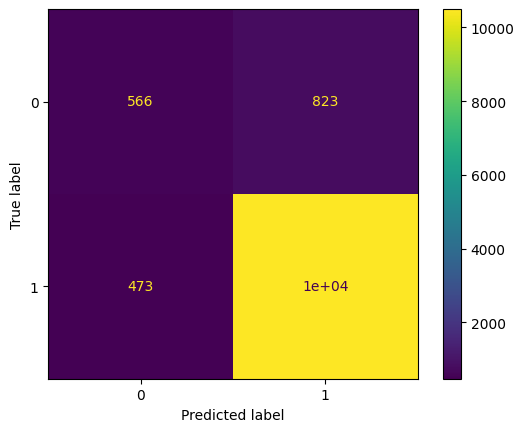

In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=['0', '1' ])
disp.plot()
plt.show()

### Logistic Regression

In [ ]:
# Logistic Regression Model

model_logreg = LogisticRegression( max_iter=1000,random_state=42)
start_time = time.time()
model_logreg.fit(X_train, y_train)
end_time = time.time()

y_pred = model_logreg.predict(X_test)
train_accuracy = accuracy_score(y_train, model_logreg.predict(X_train))
test_accuracy = accuracy_score(y_test,y_pred)

train_time = end_time - start_time

print(f'Train Time: {train_time} seconds')
print(f'Train Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Train Time: 0.19118332862854004 seconds
Train Accuracy: 91.04%
Test Accuracy: 91.02%


### Decision Tree

In [ ]:
# Decision Tree Classifier

model_dt = DecisionTreeClassifier(max_depth=2)
start_time = time.time()
model_dt.fit(X_train, y_train)
end_time = time.time()

y_pred = model_dt.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, model_dt.predict(X_train))

train_time = end_time - start_time

print(f'Train Time: {train_time} seconds')
print(f'Train Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Train Time: 0.09694695472717285 seconds
Train Accuracy: 90.35%
Test Accuracy: 90.35%


### Support Vectore Machines

In [ ]:
# Support Vector Machines

model_svc = svm.SVC(kernel='linear')
start_time = time.time()
model_svc.fit(X_train, y_train)
end_time = time.time()

y_pred = model_svc.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, model_svc.predict(X_train))

train_time = end_time - start_time

print(f'Train Time: {train_time} seconds')
print(f'Train Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Train Time: 31.204416275024414 seconds
Train Accuracy: 90.09%
Test Accuracy: 90.07%


| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|  KNN  | 0.02 seconds |94.00%    | 89.51%    |
|  Logistic Regression  | 0.18 seconds |91.04%    | 91.02%    |
|  Decision Trees  | 0.055 seconds |90.35%    | 90.35%    |
|  SVM | 35.61 seconds |90.09%    | 90.07%    |

## Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### K Nearest Neighbor

In [ ]:
knn_pipe= Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
param_grid = {'knn__n_neighbors': [3, 5, 7, 9, 11]}
grid = GridSearchCV(knn_pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
best_parameters = grid.best_params_
best_estimator = grid.best_estimator_
best_score = grid.best_score_
print("Best Parameters:", best_parameters)
print("Best Estimator:", best_estimator)
print("Best Score:", best_score)

Best Parameters: {'knn__n_neighbors': 11}
Best Estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=11))])
Best Score: 0.9044085377945169


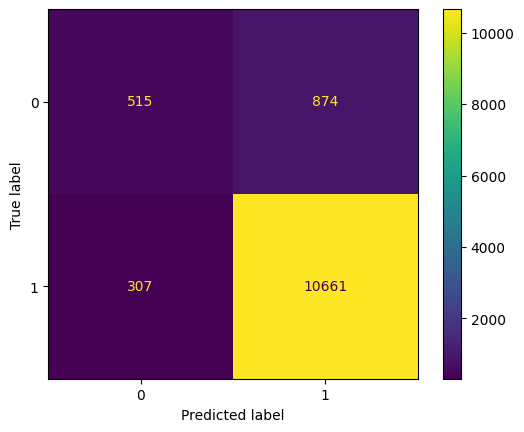

In [ ]:
confusion_mat = confusion_matrix(y_test, grid.predict(X_test), labels=[1, 0])
confusion_mat
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=['0', '1' ])
disp.plot()
plt.show()

In [ ]:
print('Accuracy Score : ', accuracy_score(y_test, grid.predict(X_test)), '\n')
print('Classification Report : \n', classification_report(y_test, grid.predict(X_test)), '\n')

Accuracy Score :  0.9044266407704136 

Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     10968
           1       0.63      0.37      0.47      1389

    accuracy                           0.90     12357
   macro avg       0.78      0.67      0.71     12357
weighted avg       0.89      0.90      0.89     12357
 



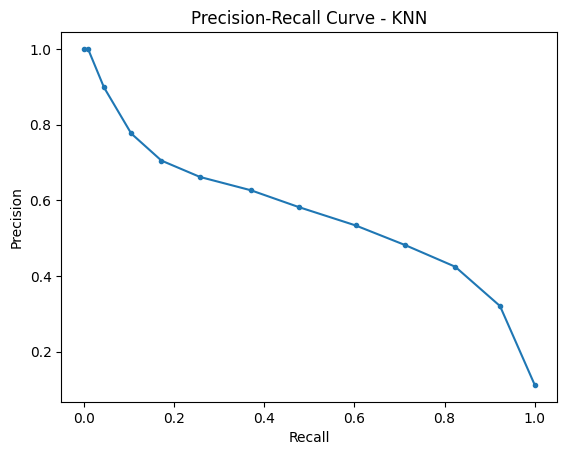

In [ ]:
# presicion recall curve - KNN
precision, recall, _ = precision_recall_curve(y_test, grid.predict_proba(X_test)[:,1])

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - KNN')
plt.show()

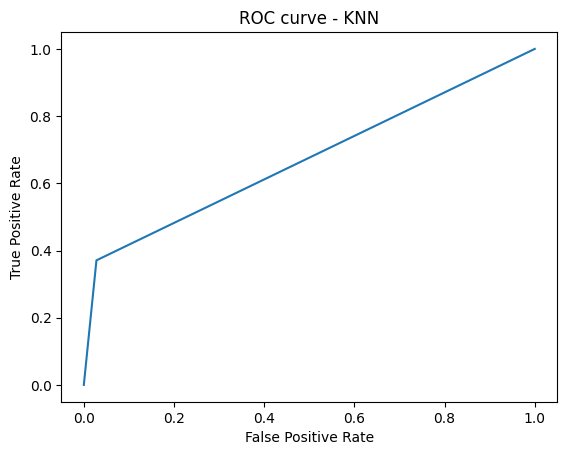

ROC AUC: 0.6713899102513812


In [ ]:
# ROC curve - KNN

fpr, tpr, thresholds = roc_curve(y_test, grid.predict(X_test))

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - KNN')
plt.show()

auc = roc_auc_score(y_test, grid.predict(X_test))
print(f'ROC AUC: {auc}')

### Logistic Regression

In [ ]:
# Define the parameter grid for logistic regression

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
logistic_regression = LogisticRegression()
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Parameters:", best_parameters)
print("Best Estimator:", best_estimator)
print("Best Score:", best_score)

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Estimator: LogisticRegression(C=0.1, solver='newton-cg')
Best Score: 0.910166236413587


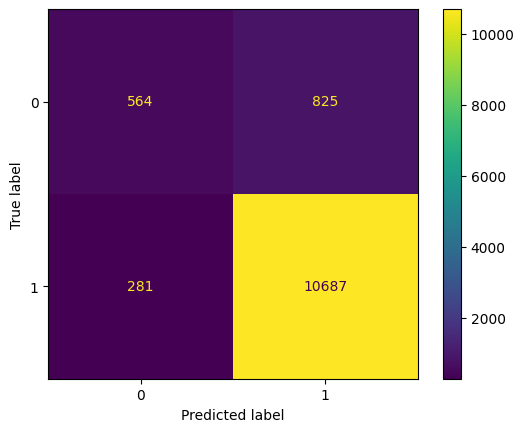

In [ ]:
confusion_mat = confusion_matrix(y_test, grid_search.predict(X_test), labels=[1, 0])
confusion_mat
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=['0', '1' ])
disp.plot()
plt.show()

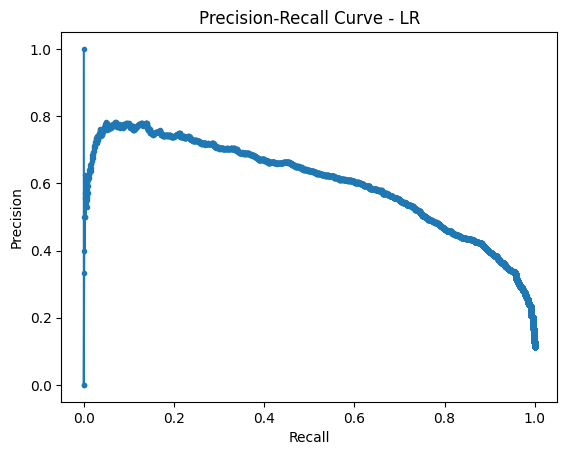

In [ ]:
# presicion recall curve - LR
precision, recall, _ = precision_recall_curve(y_test, grid_search.predict_proba(X_test)[:,1])

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - LR')
plt.show()

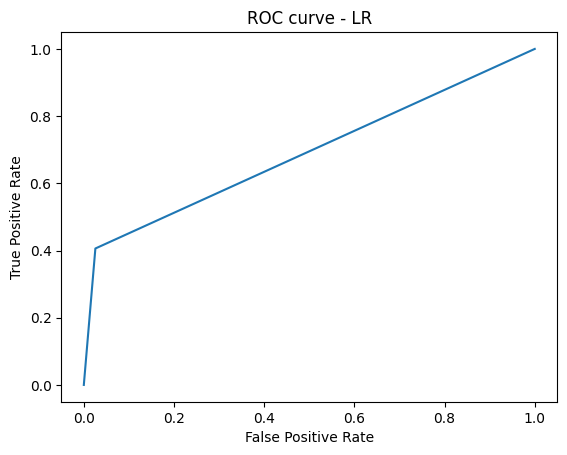

ROC AUC: 0.690213765393298


In [ ]:
# ROC curve - LR
fpr, tpr, thresholds = roc_curve(y_test, grid_search.predict(X_test))

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - LR')
plt.show()

auc = roc_auc_score(y_test, grid_search.predict(X_test))
print(f'ROC AUC: {auc}')

### Decision Tree

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Estimator: DecisionTreeClassifier(max_depth=3)
Best Score: 0.5737739219492409
Accuracy Score :  0.8875940762320952 

Classification Report : 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     10968
           1       0.00      0.00      0.00      1389

    accuracy                           0.89     12357
   macro avg       0.44      0.50      0.47     12357
weighted avg       0.79      0.89      0.83     12357
 



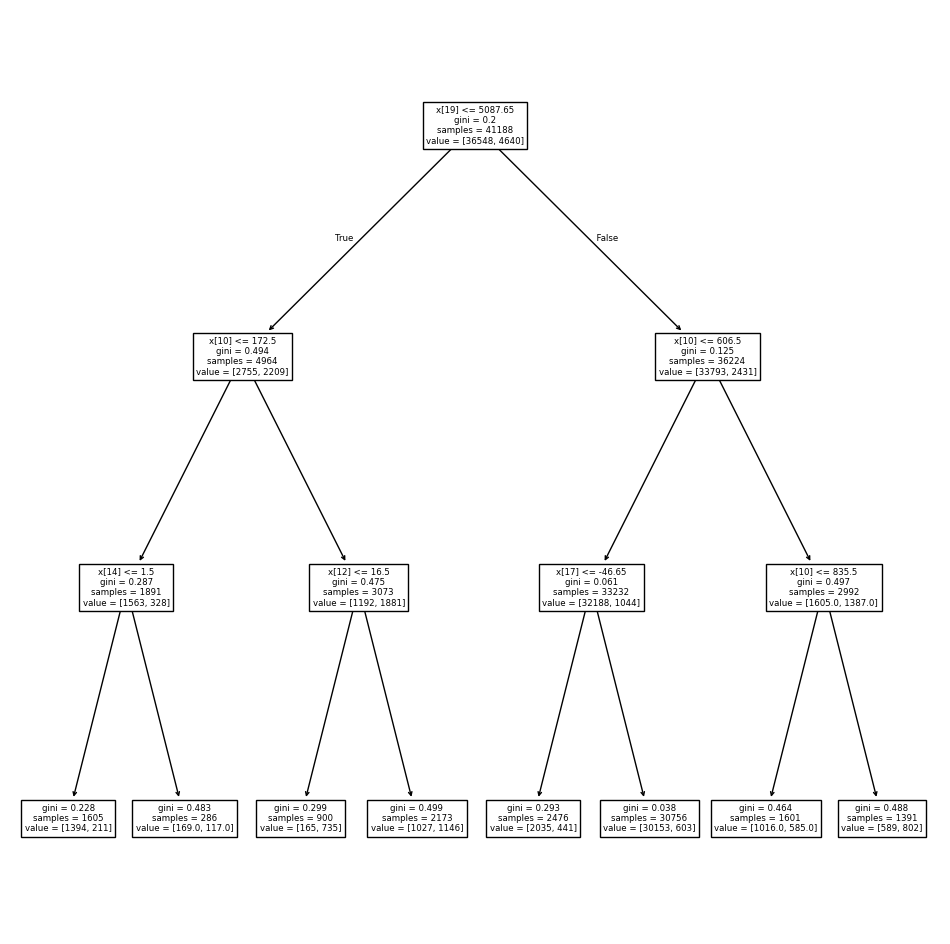

In [ ]:
# Define the parameter grid for Decesion Tree

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

# Create the GridSearchCV object and fit
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X, y)

# Get the best parameters, best score, and accuracy
best_params = grid_search.best_params_
best_score = grid_search.best_score_
y_pred = grid_search.predict(X)
accuracy = accuracy_score(y, y_pred)
best_parameters = grid_search.best_params_
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Parameters:", best_parameters)
print("Best Estimator:", best_estimator)
print("Best Score:", best_score)

print('Accuracy Score : ', accuracy_score(y_test, grid_search.predict(X_test)), '\n')
print('Classification Report : \n', classification_report(y_test, grid_search.predict(X_test)), '\n')

# Plot the decision tree
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(grid_search.best_estimator_, ax=ax)
plt.show()

### Support Vector Machines

In [ ]:
# Define the parameter grid for GridSearchCV - SVM

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}

# Create the SVM classifier and fit
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
best_parameters = grid_search.best_params_
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best Parameters:", best_parameters)
print("Best Estimator:", best_estimator)
print("Best Score:", best_score)

print('Accuracy Score : ', accuracy_score(y_test, grid_search.predict(X_test)), '\n')
print('Classification Report : \n', classification_report(y_test, grid_search.predict(X_test)), '\n')

##### Questions